In [2]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


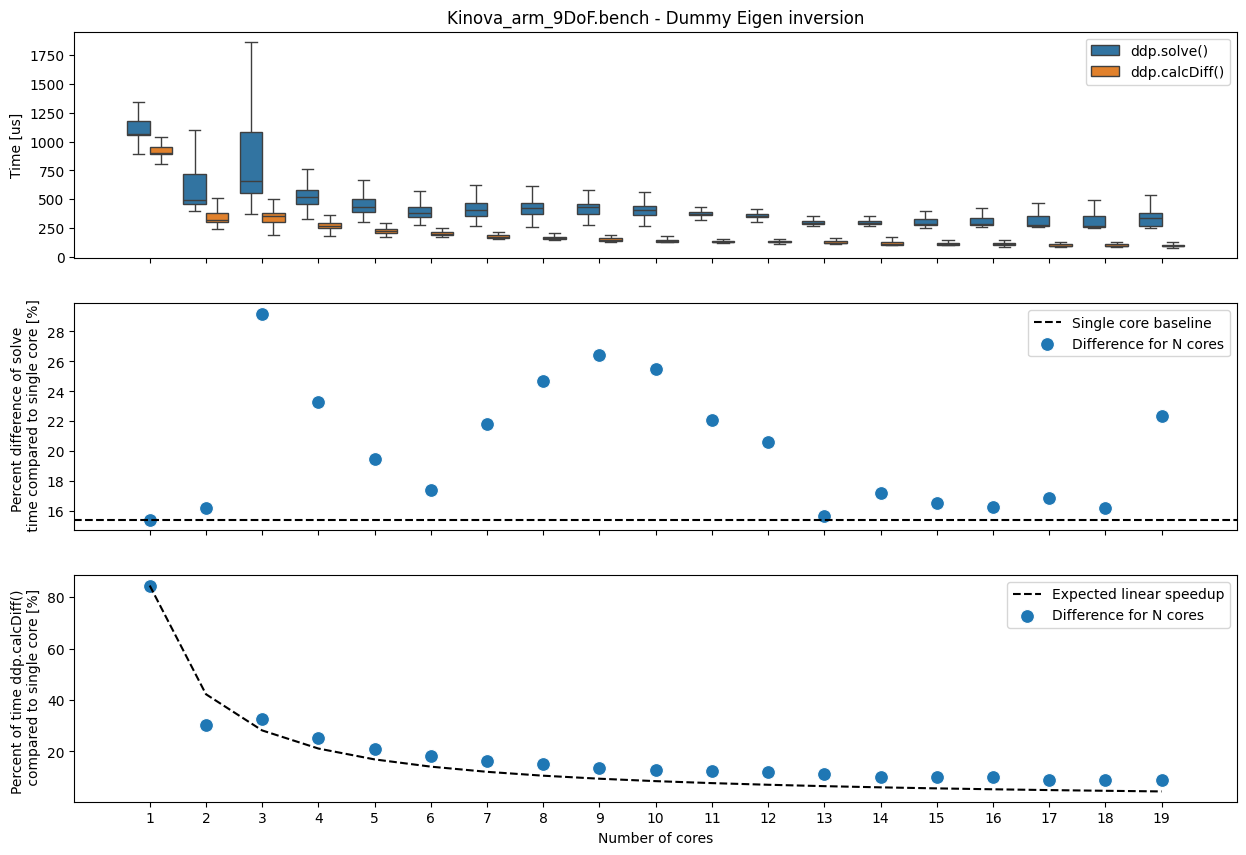

In [254]:
filename = "Kinova_arm_9DoF.bench"

df = pd.read_csv("/tmp/" + filename)

fig, axs = plt.subplots(3, 1, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(15)


sns.boxplot(data=df, x="nthreads", y="time", hue="fn_name", showfliers=False, ax=axs[0])
# sns.boxplot(data=df[df["fn_name"] == "single_core"], x="nthreads", y="time", showfliers=False, ax=axs[0])
axs[0].set(
    xlabel="",
    ylabel="Time [us]",
    title=filename + " - Dummy Eigen inversion",
)
legend = axs[0].legend()


solve = df[df["fn_name"] == "ddp.solve()"].groupby("nthreads")["time"].median()
calcDiff = df[df["fn_name"] == "ddp.calcDiff()"].groupby("nthreads")["time"].median()
err = solve - calcDiff
err = err / solve[1] * 100.0

axs[1].axhline(y=err[1], color="k", linestyle="--", label="Single core baseline")
sns.scatterplot(
    x=err.index - 1,
    y=err.values,
    label="Difference for N cores",
    s=100,
    ax=axs[1],
)
axs[1].set(
    xlabel="Number of cores",
    ylabel="Percent difference of solve \n time compared to single core [%]",
)
legend = axs[1].legend()


solve_diff = calcDiff / solve[1] * 100.0
linear_speedup = solve_diff[1] / solve_diff.index

axs[2].plot(
    solve_diff.index - 1,
    linear_speedup.values,
    color="k",
    linestyle="--",
    label="Expected linear speedup",
)

# axs[2].axhline(y=solve_diff[1], color="k", linestyle="--", label="Single core baseline")
sns.scatterplot(
    x=solve_diff.index - 1,
    y=solve_diff.values,
    label="Difference for N cores",
    s=100,
    ax=axs[2],
)
axs[2].set(
    xlabel="Number of cores",
    ylabel="Percent of time ddp.calcDiff() \n compared to single core [%]",
)
axs[2].legend(loc="upper right")

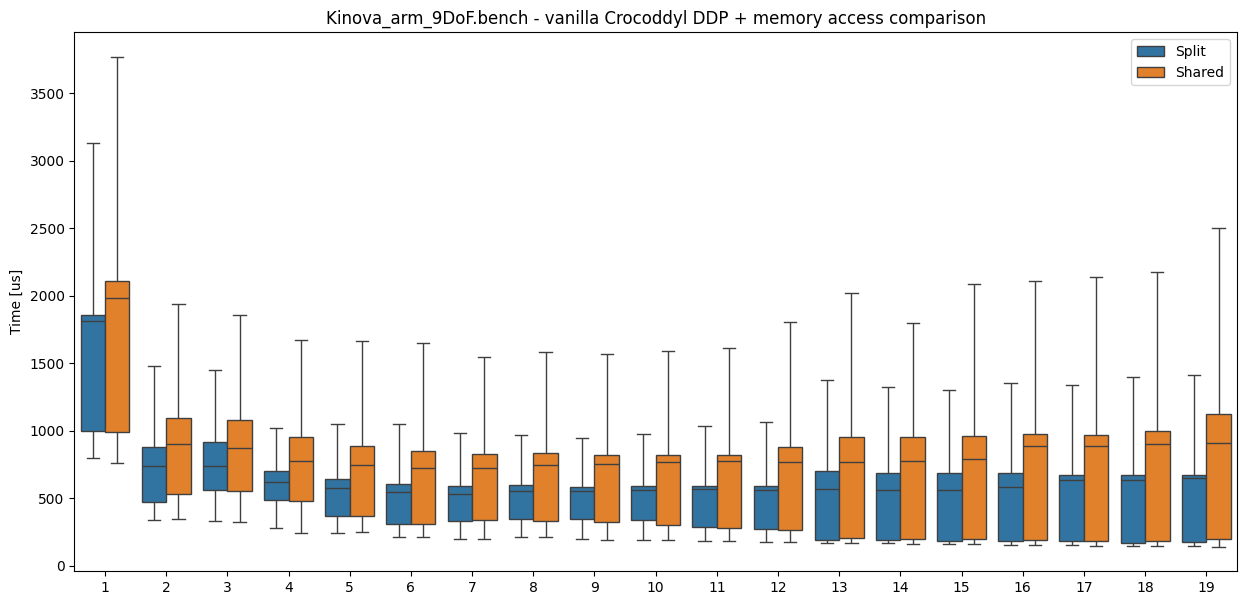

In [ ]:
filename = "Kinova_arm_9DoF.bench"

df1 = pd.read_csv("/home/gepetto/ros_ws/src/vanilla_ddp_non_shared.csv")
df1["memory"] = "Split"
df2 = pd.read_csv("/home/gepetto/ros_ws/src/vanilla_ddp_shared.csv")
df2["memory"] = "Shared"

df = pd.concat([df1, df2])

fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(15)


ax = sns.boxplot(data=df, x="nthreads", y="time", hue="memory", showfliers=False)
ax.set(
    xlabel="",
    ylabel="Time [us]",
    title=filename + " - vanilla Crocoddyl DDP + memory access comparison",
)
legend = ax.legend()

<Axes: xlabel='nthreads', ylabel='time'>

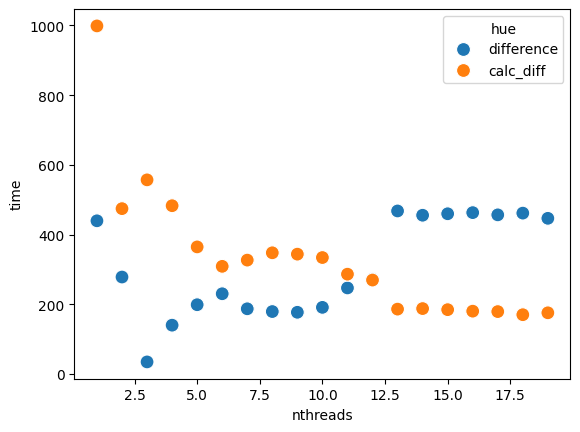

In [ ]:
filename = "Kinova_arm_9DoF.bench"

df1 = pd.read_csv("/home/gepetto/ros_ws/src/vanilla_ddp_non_shared.csv")
df2 = pd.read_csv("/home/gepetto/ros_ws/src/backward_pass_no_parallelize.csv")

# fig = plt.figure()
# fig.set_figheight(7)
# fig.set_figwidth(15)


solve = df1[df1["fn_name"] == "ddp.solve()"].groupby("nthreads")["time"].median()
backwardPass = (
    df2[df2["fn_name"] == "ddp.calcDiff()"].groupby("nthreads")["time"].median()
)
solve_backward = (solve - backwardPass).to_frame()
solve_backward["hue"] = "difference"

calcDiff = (
    df1[df1["fn_name"] == "ddp.calcDiff()"]
    .groupby("nthreads")["time"]
    .median()
    .to_frame()
)
calcDiff["hue"] = "calc_diff"

df = pd.concat([solve_backward, calcDiff])


sns.scatterplot(data=df, x="nthreads", y="time", hue="hue", s=100)

/tmp/ipykernel_22168/3848381783.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = ax.legend()


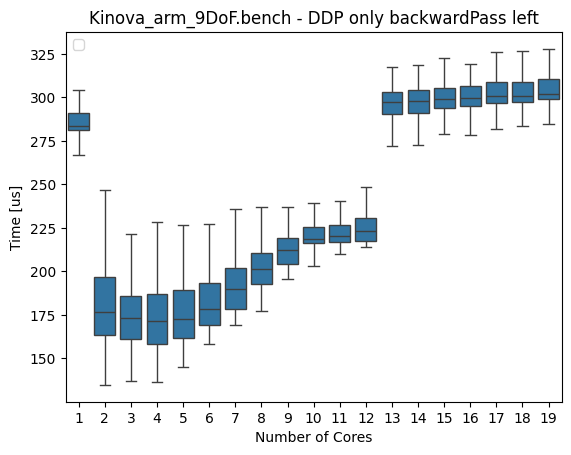

In [ ]:
filename = "Kinova_arm_9DoF.bench"

df = pd.read_csv("/home/gepetto/ros_ws/src/backward_pass_no_parallelize.csv")


ax = sns.boxplot(
    data=df[df["fn_name"] == "ddp.solve()"], x="nthreads", y="time", showfliers=False
)
ax.set(
    xlabel="Number of Cores",
    ylabel="Time [us]",
    title=filename + " - DDP only backwardPass left",
)
legend = ax.legend()

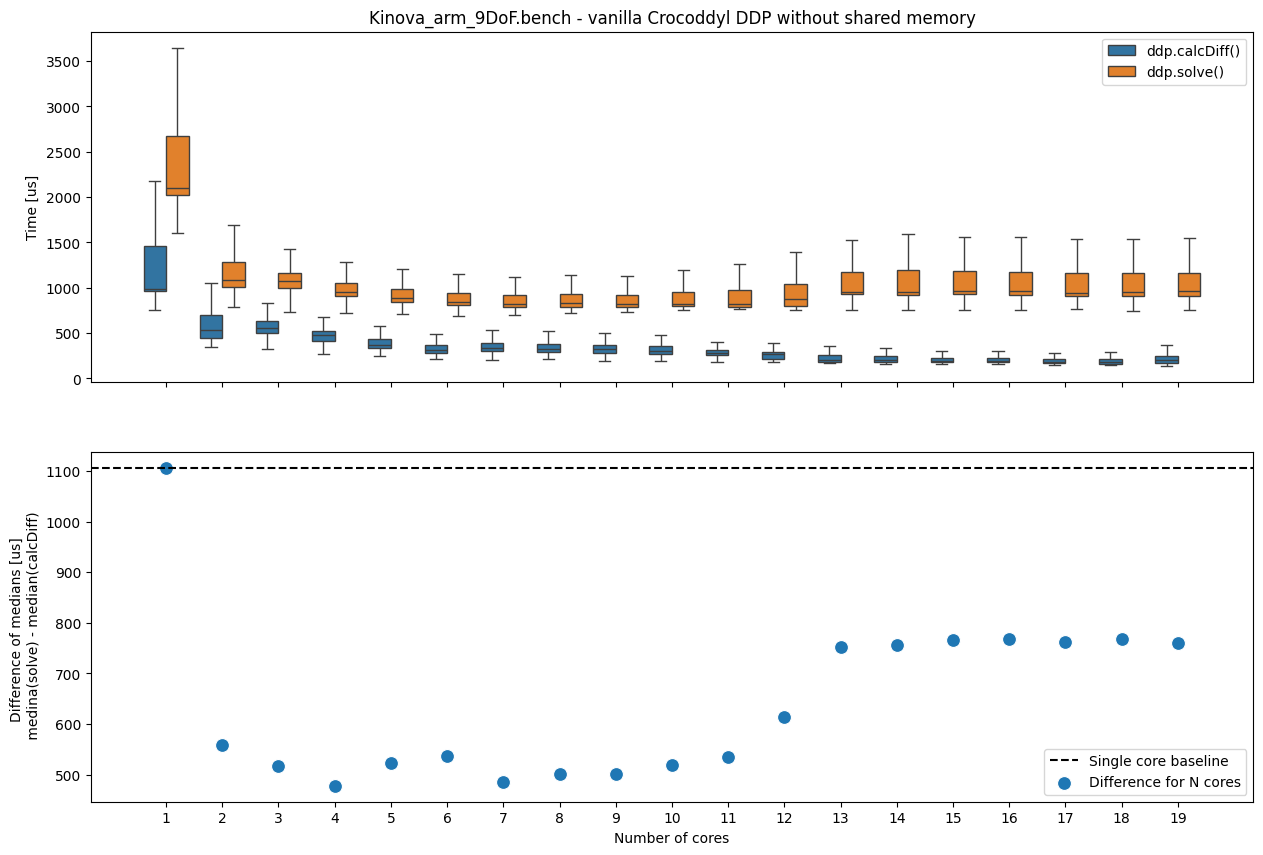

In [ ]:
filename = "Kinova_arm_9DoF.bench"

df = pd.read_csv("/home/gepetto/ros_ws/src/vanilla_ddp_shared.csv")

fig, axs = plt.subplots(2, 1, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(15)


sns.boxplot(data=df, x="nthreads", y="time", hue="fn_name", showfliers=False, ax=axs[0])
# sns.boxplot(data=df[df["fn_name"] == "ddp.solve()"], x="nthreads", y="time", showfliers=False, ax=axs[0])
axs[0].set(
    xlabel="",
    ylabel="Time [us]",
    title=filename + " - vanilla Crocoddyl DDP without shared memory",
)
legend = axs[0].legend()


solve = df[df["fn_name"] == "ddp.solve()"].groupby("nthreads")["time"].median()
calcDiff = df[df["fn_name"] == "ddp.calcDiff()"].groupby("nthreads")["time"].median()
diff_df = solve - calcDiff

axs[1].axhline(y=diff_df[1], color="k", linestyle="--", label="Single core baseline")
sns.scatterplot(
    x=diff_df.index - 1,
    y=diff_df.values,
    label="Difference for N cores",
    s=100,
    ax=axs[1],
)
axs[1].set(
    xlabel="Number of cores",
    ylabel="Difference of medians [us] \n medina(solve) - median(calcDiff)",
)
axs[1].legend(loc="lower right")